In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('C:/Users/User/python_virt_env/sangiovese.csv')
data

,Treatment,SproutN,BunchN,GrapeW,WoodW,SPAD06,NDVI06,SPAD08,NDVI08,Acid,Potass,Brix,pH,Anthoc,Polyph
0,T6b,0.202349,0.295120,0.007353,-0.044060,0.123074,-0.011439,0.012205,0.085229,0.203979,-0.104303,-0.127506,-0.051799,-0.275240,-0.193690
1,T7b,0.266060,0.425589,0.119441,0.410288,-0.003285,0.026199,0.140954,0.113828,0.046233,-0.150271,0.075906,0.004393,0.280481,0.379005
2,T8b,0.415644,0.078505,0.439378,0.363778,0.100210,0.090508,0.040111,-0.019662,-0.138107,-0.027917,0.003320,0.041966,-0.016803,-0.259305
3,T4a,-0.120736,0.073215,-0.310475,0.122281,-0.115675,-0.043585,0.042341,0.154439,-0.088854,0.049449,0.095224,0.035857,-0.057244,-0.141223
4,T5b,0.108829,0.355558,-0.483608,-0.525597,-0.173176,-0.139314,-0.216183,-0.121072,0.052817,-0.315021,0.062484,-0.008910,-0.023187,0.172194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T2a,-0.088483,-0.296049,0.364335,0.620447,0.033737,0.085385,0.077058,-0.013535,0.072894,0.066403,-0.010224,-0.011085,0.218075,0.024744
996,T1b,-0.271246,-0.643934,-1.279187,-0.266497,-0.018328,-0.008231,-0.142505,-0.044881,0.211698,-0.176136,0.042513,-0.045726,0.409988,0.237019
997,T8b,0.168427,-0.596038,0.203730,0.359664,0.142399,0.120647,0.295305,0.194176,-0.390239,0.116520,-0.051606,0.046419,0.231731,-0.210982
998,T1a,-0.107611,-0.153681,-0.360631,0.113596,-0.012307,0.035794,-0.044218,-0.045161,0.093396,0.047163,-0.020589,-0.009988,-0.284049,-0.094482


<AxesSubplot:>

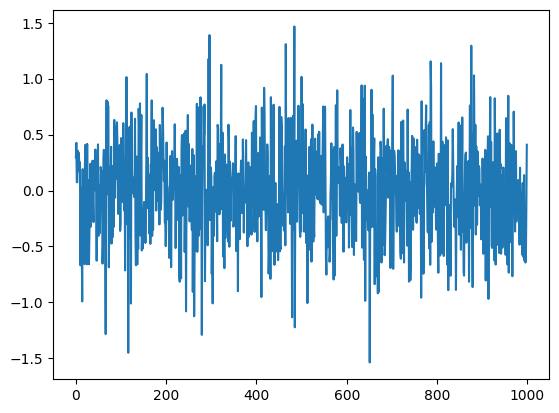

In [3]:
data['BunchN'].plot()

In [4]:
import bamt.Networks as net
import bamt.Preprocessors as pp
from sklearn import preprocessing

In [5]:
encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

p = pp.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
discretized_data, est = p.apply(data)
discretized_data

,Treatment,SproutN,BunchN,GrapeW,WoodW,SPAD06,NDVI06,SPAD08,NDVI08,Acid,Potass,Brix,pH,Anthoc,Polyph
0,11,4,3,2,2,4,2,2,3,4,1,0,0,1,1
1,13,4,4,2,4,2,2,4,3,2,0,4,2,3,4
2,15,4,2,3,3,4,4,3,2,0,2,2,4,2,0
3,6,1,2,1,3,0,1,3,4,1,3,4,4,2,1
4,9,3,4,1,0,0,0,0,0,3,0,3,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,3,4,3,3,3,2,3,3,2,2,3,2
996,1,0,0,0,1,2,2,0,1,4,0,3,0,4,4
997,15,4,0,3,3,4,4,4,4,0,3,1,4,3,0
998,0,1,1,1,2,2,3,1,1,3,3,1,2,1,1


In [6]:
bn = net.HybridBN(has_logit=False, use_mixture=False) # init BN
info = p.info
info

{'types': {'Treatment': 'disc',
  'SproutN': 'cont',
  'BunchN': 'cont',
  'GrapeW': 'cont',
  'WoodW': 'cont',
  'SPAD06': 'cont',
  'NDVI06': 'cont',
  'SPAD08': 'cont',
  'NDVI08': 'cont',
  'Acid': 'cont',
  'Potass': 'cont',
  'Brix': 'cont',
  'pH': 'cont',
  'Anthoc': 'cont',
  'Polyph': 'cont'},
 'signs': {'SproutN': 'neg',
  'BunchN': 'neg',
  'GrapeW': 'neg',
  'WoodW': 'neg',
  'SPAD06': 'neg',
  'NDVI06': 'neg',
  'SPAD08': 'neg',
  'NDVI08': 'neg',
  'Acid': 'neg',
  'Potass': 'neg',
  'Brix': 'neg',
  'pH': 'neg',
  'Anthoc': 'neg',
  'Polyph': 'neg'}}

In [7]:
bn.add_nodes(info)

In [8]:
from pgmpy.estimators import K2Score

bn.add_edges(discretized_data,  scoring_function=('K2',K2Score))

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [9]:
bn.get_info()

,name,node_type,data_type,parents,parents_types
0,Treatment,Discrete,disc,[],[]
1,pH,ConditionalGaussian,cont,[Treatment],[disc]
2,Acid,Gaussian,cont,[pH],[cont]
3,SPAD06,Gaussian,cont,[pH],[cont]
4,Potass,Gaussian,cont,[pH],[cont]
5,SproutN,ConditionalGaussian,cont,"[SPAD06, Treatment]","[cont, disc]"
6,WoodW,Gaussian,cont,[SPAD06],[cont]
7,GrapeW,Gaussian,cont,[WoodW],[cont]
8,NDVI08,Gaussian,cont,[WoodW],[cont]
9,SPAD08,Gaussian,cont,"[WoodW, SPAD06]","[cont, cont]"


In [65]:
bn.fit_parameters(data)

In [11]:
bn.edges

[['Treatment', 'SproutN'],
 ['Treatment', 'pH'],
 ['GrapeW', 'BunchN'],
 ['GrapeW', 'Anthoc'],
 ['GrapeW', 'Brix'],
 ['WoodW', 'GrapeW'],
 ['WoodW', 'NDVI08'],
 ['WoodW', 'SPAD08'],
 ['SPAD06', 'SPAD08'],
 ['SPAD06', 'SproutN'],
 ['SPAD06', 'WoodW'],
 ['SPAD08', 'NDVI06'],
 ['pH', 'Acid'],
 ['pH', 'SPAD06'],
 ['pH', 'Potass'],
 ['pH', 'Brix'],
 ['Anthoc', 'Polyph']]

In [60]:
def shg(edges, true_structure):
    same = 0
    dif_direction= 0
    
    for i in true_structure:
        for j in edges:
            if i == j:
                same += 1
                break
            else:
                if i[0] == j[1] and i[1] == j[0]:
                    dif_direction += 1
                    break
        M = len(edges)
        N = len(true_structure)
        
    return M + N - 2*same - dif_direction

In [83]:
struct = []
with open('sangiovese_true.txt', 'r') as file:
    for line in file:
        struct.append(line.split())
struct

[['Treatment', 'SproutN'],
 ['Treatment', 'BunchN'],
 ['Treatment', 'SPAD06'],
 ['Treatment', 'Brix'],
 ['SproutN', 'BunchN'],
 ['SproutN', 'GrapeW'],
 ['SproutN', 'WoodW'],
 ['SproutN', 'SPAD06'],
 ['SproutN', 'NDVI06'],
 ['SproutN', 'NDVI08'],
 ['SproutN', 'Acid'],
 ['SproutN', 'pH'],
 ['BunchN', 'GrapeW'],
 ['BunchN', 'WoodW'],
 ['BunchN', 'Acid'],
 ['BunchN', 'Potass'],
 ['BunchN', 'Anthoc'],
 ['BunchN', 'Polyph'],
 ['WoodW', 'GrapeW'],
 ['WoodW', 'pH'],
 ['WoodW', 'Anthoc'],
 ['SPAD06', 'WoodW'],
 ['SPAD06', 'NDVI06'],
 ['SPAD06', 'SPAD08'],
 ['SPAD06', 'Acid'],
 ['SPAD06', 'Potass'],
 ['SPAD06', 'pH'],
 ['NDVI06', 'GrapeW'],
 ['NDVI06', 'SPAD08'],
 ['NDVI06', 'NDVI08'],
 ['NDVI06', 'Acid'],
 ['NDVI06', 'Polyph'],
 ['SPAD08', 'WoodW'],
 ['SPAD08', 'NDVI08'],
 ['NDVI08', 'GrapeW'],
 ['NDVI08', 'WoodW'],
 ['NDVI08', 'Acid'],
 ['NDVI08', 'Anthoc'],
 ['NDVI08', 'Polyph'],
 ['Acid', 'GrapeW'],
 ['Acid', 'pH'],
 ['Potass', 'pH'],
 ['Brix', 'GrapeW'],
 ['Brix', 'Acid'],
 ['Brix', 'pH'],


In [76]:
for i in range(4):
    for j in range(5):
        if j == 2:
            break
        print(j)
        

0
1
0
1
0
1
0
1
